# Prénom : HALIMA  --- Nom : BANANI

# Sujet : surface-defect-detection

#  Importation de bibliothèques

In [23]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
import cv2

# Lecture des données d’entrée

In [2]:
data_dir_train = pathlib.Path("C:\\Users\\HALIMA\\Desktop\\PROJECT\\PROJECT\\surface-defect-detection\\Train")

data_dir_test = pathlib.Path("C:\\Users\\HALIMA\\Desktop\\PROJECT\\PROJECT\\surface-defect-detection\\Test")


# Préparer l’ensemble de données

In [3]:
batch_size=32
img_height=180
img_widh=180

In [4]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_widh),
    batch_size=batch_size)

Found 4217 files belonging to 2 classes.


In [5]:
data_val = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_widh),
  batch_size=batch_size)

Found 299 files belonging to 2 classes.


In [6]:
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_test,
#   validation_split=0.9,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_widh),
#   batch_size=batch_size)

In [7]:
class_names=data_train.class_names
print(class_names)

['Negative', 'Positive']


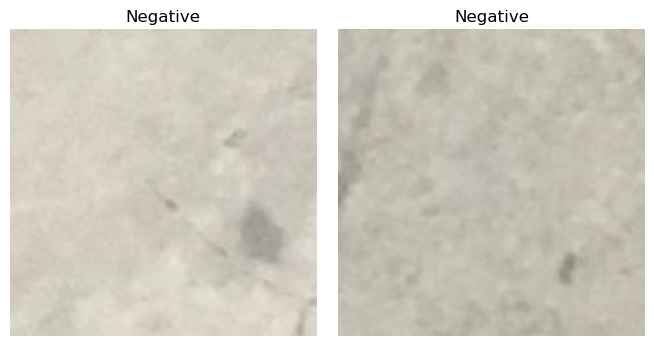

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in data_train.take(1):
    for i in range(2):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.tight_layout()
plt.show()


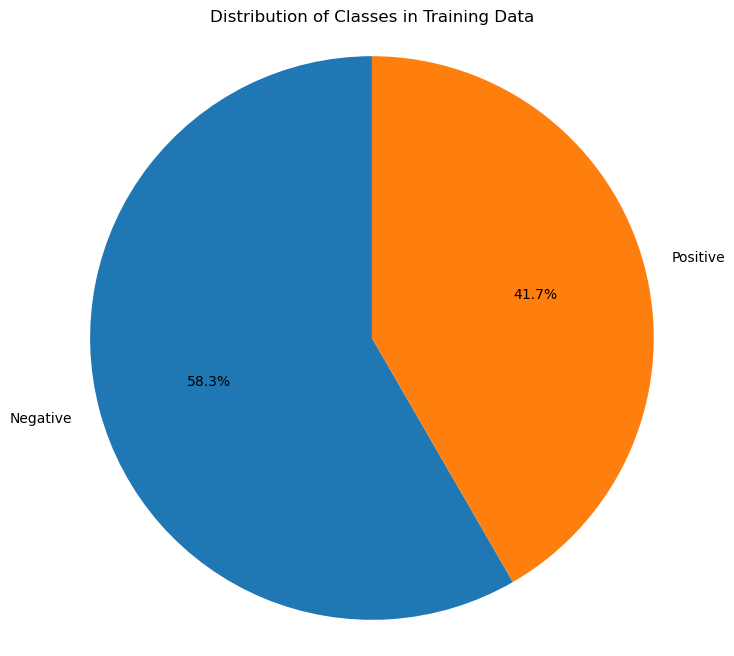

In [9]:
import matplotlib.pyplot as plt

# Get the class names from the dataset
class_names = data_train.class_names

# Count the occurrences of each class in the dataset
class_counts = [0] * len(class_names)
for images, labels in data_train:
    for label in labels:
        class_counts[label] += 1

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Classes in Training Data')
plt.show()


In [10]:

class_names = data_train.class_names

class_counts = {class_name: 0 for class_name in class_names}

for _, labels in data_train:
    for label in labels:
        class_counts[class_names[label]] += 1

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_name, count in class_counts.items():
    print(f"{class_names.index(class_name):<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts.values()):<10}")


Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               Negative                       2460      
1               Positive                       1757      
------------------------------------------------------------
Total                                         4217      


# Création du modèle CNN

In [11]:
model_1 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_widh, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    
    Dense(2, activation='softmax')
])



C:\Users\ABDESSAMAD\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,609,474 (63.36 MB)

 Trainable params: 16,609,026 (63.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
epochs = 10
history = model_1.fit(
  data_train,
  validation_data=data_val,
  epochs=epochs
)

Epoch 1/10


C:\Users\ABDESSAMAD\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


132/132 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.8816 - loss: 0.3696 - val_accuracy: 0.8629 - val_loss: 0.4103
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9745 - loss: 0.0715 - val_accuracy: 0.7993 - val_loss: 1.0473
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9799 - loss: 0.0583 - val_accuracy: 0.8863 - val_loss: 0.7110
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9912 - loss: 0.0353 - val_accuracy: 0.6656 - val_loss: 1.2407
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9902 - loss: 0.0348 - val_accuracy: 0.8060 - val_loss: 0.6149
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9970 - loss: 0.0129 - val_accuracy: 0.5117 - val_loss: 4.1867
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9897 - loss: 0.0293 - val_accuracy: 0.9398 - val_loss: 0.2304
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9964 - loss: 0.0148 - val_accuracy: 0.966

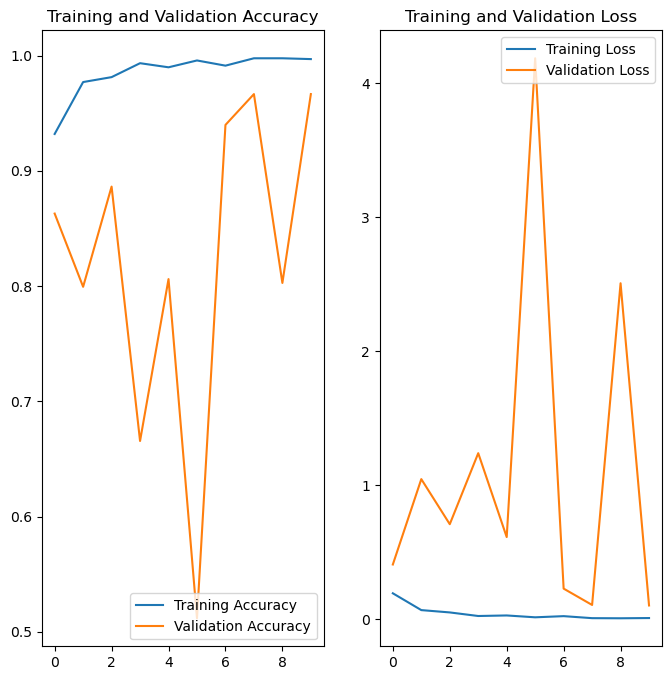

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [18]:
(eval_loss, eval_accuracy) = model_1.evaluate(data_val, batch_size=batch_size, \
                                            verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.9731 - loss: 0.0691


# Model 2 : Data Augumentation with drop out layer.

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_widh,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

C:\Users\ABDESSAMAD\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


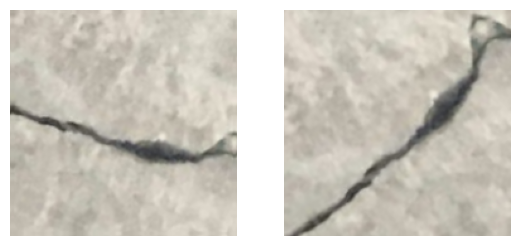

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in data_val.take(1):
    for i in range(2):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [24]:
num_classes=2
model_2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.15),  
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Dropout(0.20),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),  
  layers.Dense(num_classes,activation='softmax')
])

In [25]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
epochs = 10

history = model_2.fit(
  data_train,
  validation_data=data_val,
  epochs=epochs
)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.6531 - loss: 2.0929 - val_accuracy: 0.9766 - val_loss: 0.1919
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9576 - loss: 0.1388 - val_accuracy: 0.9666 - val_loss: 0.1050
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9692 - loss: 0.1032 - val_accuracy: 0.9866 - val_loss: 0.0526
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9814 - loss: 0.0787 - val_accuracy: 0.9900 - val_loss: 0.0455
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9788 - loss: 0.0826 - val_accuracy: 0.9933 - val_loss: 0.0554
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9814 - loss: 0.0600 - val_accuracy: 0.9933 - val_loss: 0.0477
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9809 - loss: 0.0677 - val_accuracy: 0.9866 - val_loss: 0.0372
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9854 - loss: 0.0519 - val_accu

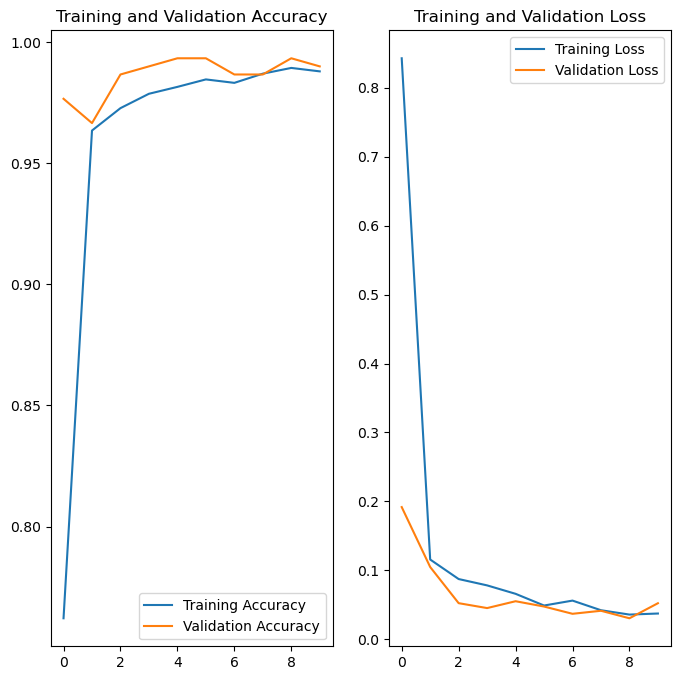

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
(eval_loss, eval_accuracy) = model_2.evaluate(data_val, batch_size=batch_size, \
                                            verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.9932 - loss: 0.0511


# Prédiction d'une image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predictions:
Negative: 30.943002700805664%
Positive: 69.05699920654297%

Predicted class: Positive with 69.05699968338013% confidence.


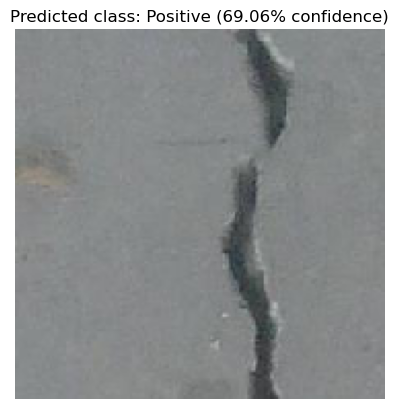

In [30]:


def predict_image(model, img_path, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_widh))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("Predictions:")
    for i in range(len(class_names)):
        print(f"{class_names[i]}: {score[i] * 100}%")

    predicted_class = class_names[np.argmax(score)]
    confidence = np.max(score) * 100
    print(f"\nPredicted class: {predicted_class} with {confidence}% confidence.")

    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class} ({confidence:.2f}% confidence)")
    plt.axis('off')
    plt.show()


image_path = "C:\\Users\\ABDESSAMAD\\Desktop\\PROJECT\\PROJECT\\surface-defect-detection\\00023.jpg"

predict_image(model_2, image_path, class_names)
